In [2]:
import pickle
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm

In [3]:
# open the file of interest, and use pickle loading
signal_file = open ("Sample_pt_250_500.pkl",'rb')
sample_dict = pickle.load(signal_file)

# list all keys of the files
sample_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [4]:
background_file = open ("qcd_100000_pt_250_500.pkl",'rb')
background_dict = pickle.load(background_file)

# list all keys of the files
background_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

There are a total of 20100 events comprising of 100 higgs events and 20000 qcd events. So, we can weigh the data.

In [5]:
n_higgs_norm = 100/20100
n_qcd_norm = 20000/20100

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
n_higgs_counts,bins1 = np.histogram(sample_dict['mass'],bins = 100)
n_qcd_counts,bins2 = np.histogram(background_dict['mass'],bins = 100)

ax[0].hist(bins2[:-1], bins2, weights=n_qcd_counts*n_qcd_norm)
ax[0].hist(bins1[:-1], bins1, weights=n_higgs_counts*n_higgs_norm)
ax[0].set_xlim([10,300])

ax[1].hist(bins2[:-1], bins2, weights=n_qcd_counts*n_qcd_norm,density=True)
ax[1].hist(bins1[:-1], bins1, weights=n_higgs_counts*n_higgs_norm,density=True)

ax[2].hist(bins2[:-1], bins2, weights=n_qcd_counts*n_qcd_norm)
ax[2].hist(bins1[:-1], bins1, weights=n_higgs_counts*n_higgs_norm)
ax[2].set_yscale('log')

plt.show()

In [18]:
np.mean(sample_dict['mass'])

114.89238664552165

The plot above shows the whole data set with the higgs data shown at ~115. 

Now I will calculate the significance.

In [87]:
n_higgs = 100
n_qcd = 20000
sigma = poisson.cdf(n_higgs + n_qcd,n_qcd)
probability = norm.isf(1-sigma)
probability

0.7112259282313185

In [88]:
sigma

0.7615278780931256

Now let's see how this approximation compares to the data.

In [38]:
approx = n_higgs/np.sqrt(n_qcd)
approx

0.7071067811865475

not equivalent, but pretty close. Although in particle physics, this approximation  is not good enough. This approximation is a gaussian statistic and gives us a good idea about what the probability value is. 

Now, I will make some mass cuts to find the the best significance

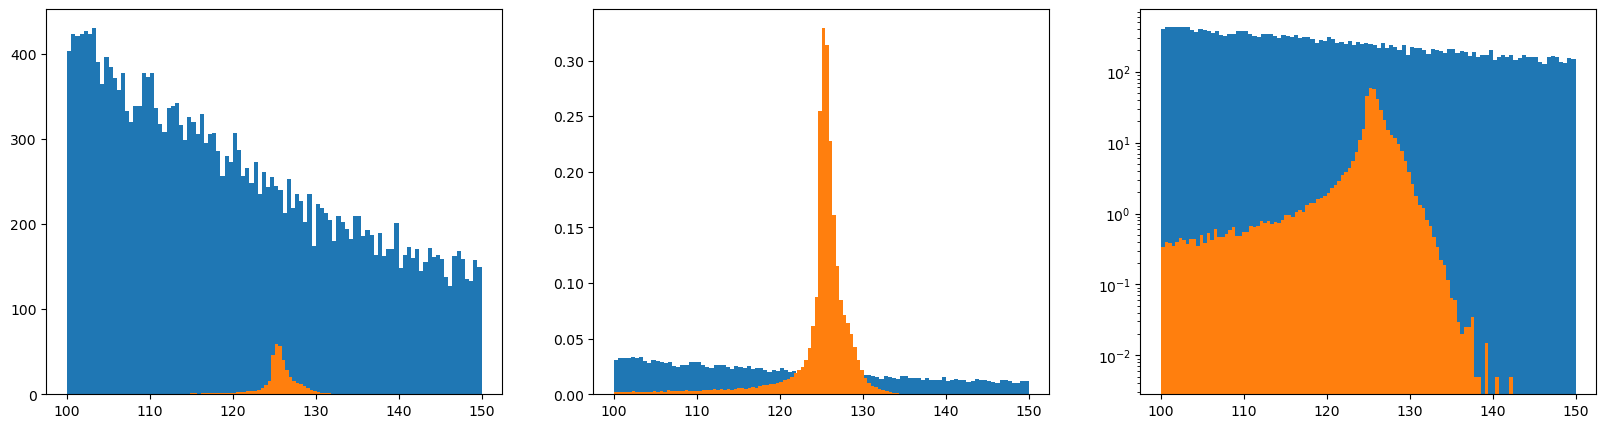

In [142]:
n_higgs_norm = 100/20100
n_qcd_norm = 20000/20100
def cut(sample_data,background_data,higgs_low_bound,higgs_high_bound,bkd_low_bound,bkd_high_bound,feature):
    cut_mass_higgs = sample_data[sample_data[feature]>higgs_low_bound]
    cut_mass_qcd = background_data[background_data[feature]>bkd_low_bound]
    
    cut_mass_higgs = cut_mass_higgs[cut_mass_higgs[feature]<higgs_high_bound]
    cut_mass_qcd = cut_mass_qcd[cut_mass_qcd[feature]<bkd_high_bound]
    
    fig,ax = plt.subplots(1,3,figsize=(20,5))
    n_higgs_counts,bins1 = np.histogram(cut_mass_higgs[feature],bins = 100)
    n_qcd_counts,bins2 = np.histogram(cut_mass_qcd[feature],bins = 100)

    ax[0].hist(bins2[:-1], bins2, weights=n_qcd_counts*n_qcd_norm)
    ax[0].hist(bins1[:-1], bins1, weights=n_higgs_counts*n_higgs_norm)

    ax[1].hist(bins2[:-1], bins2, weights=n_qcd_counts*n_qcd_norm,density=True)
    ax[1].hist(bins1[:-1], bins1, weights=n_higgs_counts*n_higgs_norm,density=True)

    ax[2].hist(bins2[:-1], bins2, weights=n_qcd_counts*n_qcd_norm)
    ax[2].hist(bins1[:-1], bins1, weights=n_higgs_counts*n_higgs_norm)
    ax[2].set_yscale('log')

    plt.show()
    return cut_mass_higgs[feature], cut_mass_qcd[feature]

cut_mass_higgs, cut_mass_qcd = cut(sample_dict,background_dict,100,150,100,150,'mass')

In [143]:
def signif(cut_mass_higgs,cut_mass_qcd,feature):
    n_higgs = 100
    n_qcd = 20000
    higgs = (sum(cut_mass_higgs) / sum(sample_dict[feature])) * n_higgs
    qcd = (sum(cut_mass_qcd) / sum(background_dict[feature])) * n_qcd

    significance = higgs / np.sqrt(qcd)
    print(significance)
    

In [144]:
signif(cut_mass_higgs,cut_mass_qcd,'mass')

1.1556144516115936


Need to find cuts to increase this number

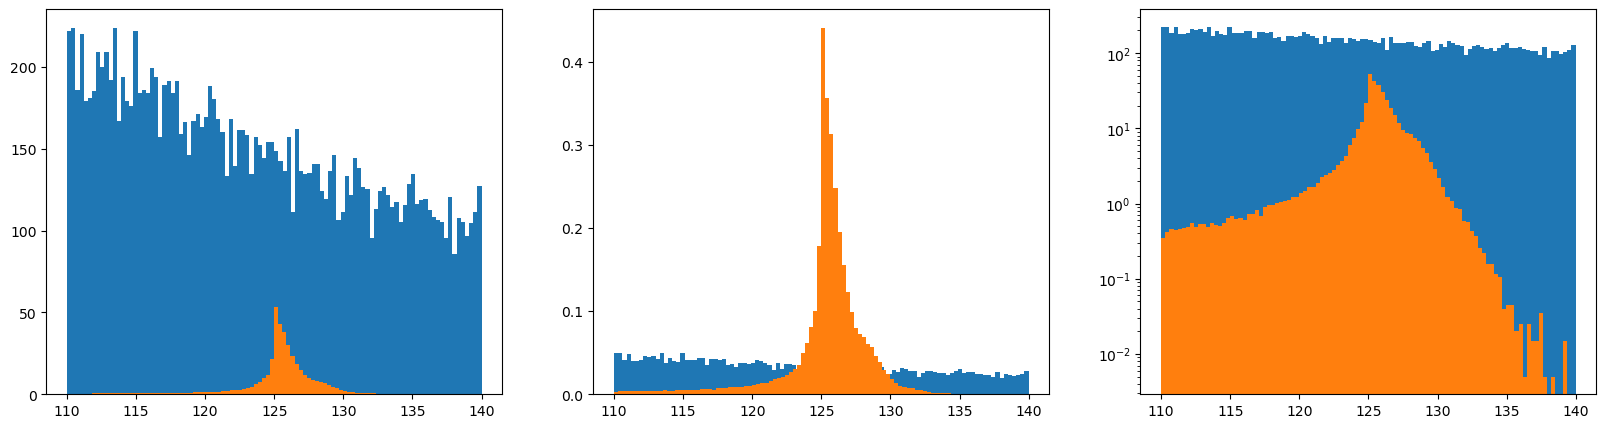

1.464999846258688


In [118]:
cut_mass_higgs, cut_mass_qcd = cut(sample_dict,background_dict,110,140,110,140,'mass')
signif(cut_mass_higgs,cut_mass_qcd,'mass')

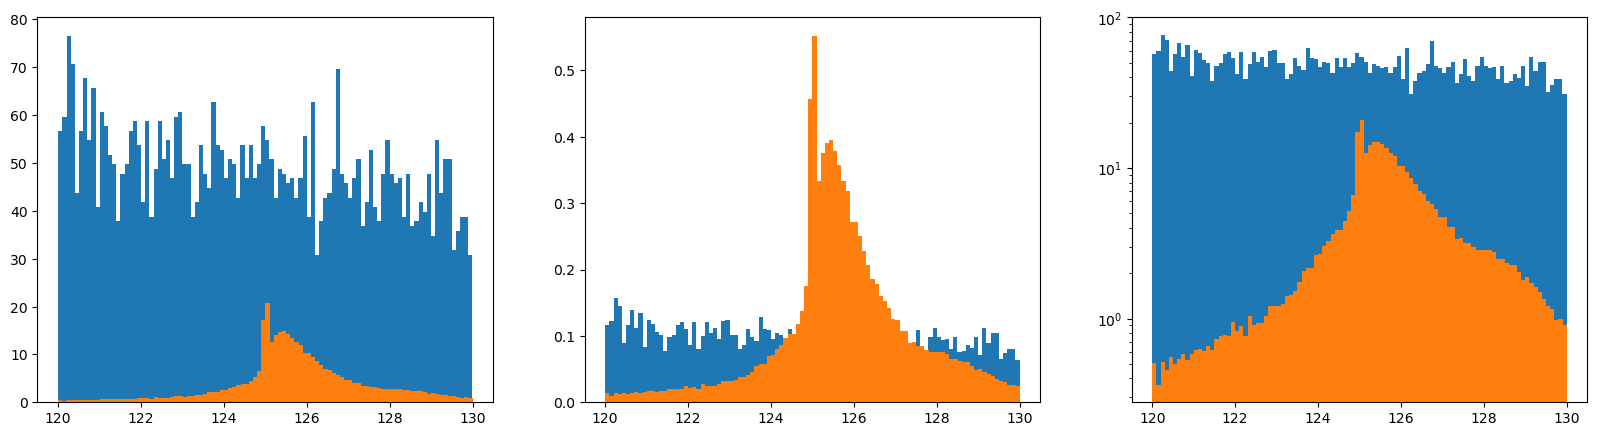

2.3470782626118902


In [119]:
cut_mass_higgs, cut_mass_qcd = cut(sample_dict,background_dict,120,130,120,130,'mass')
signif(cut_mass_higgs,cut_mass_qcd,'mass')

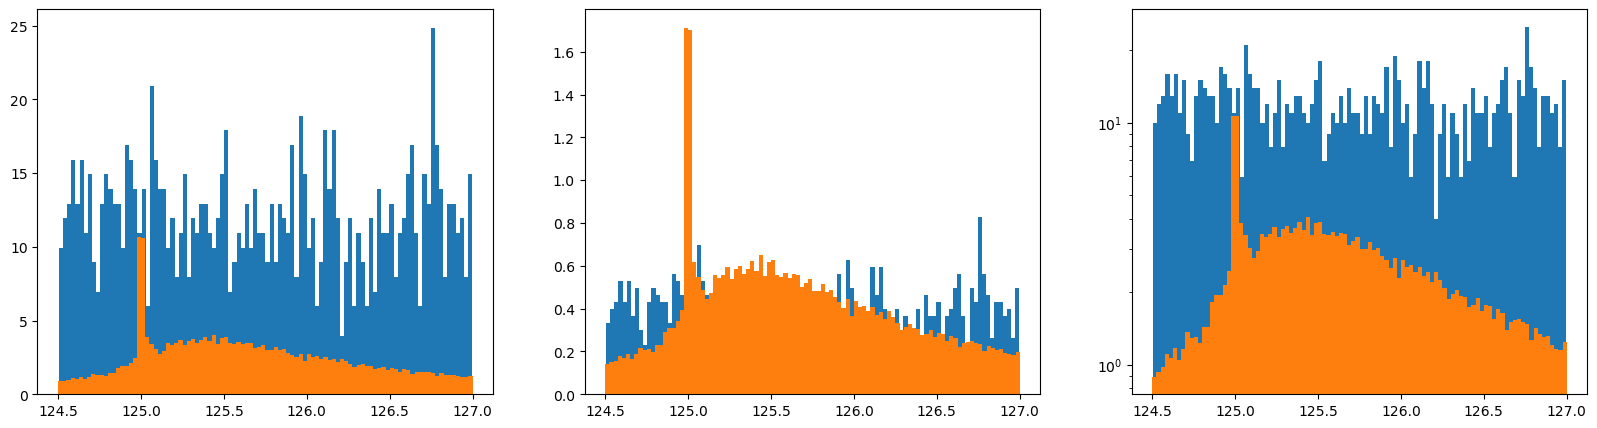

3.1007590939315057


In [127]:
cut_mass_higgs, cut_mass_qcd = cut(sample_dict,background_dict,124.5,127,124.5,127,'mass')
signif(cut_mass_higgs,cut_mass_qcd,'mass')

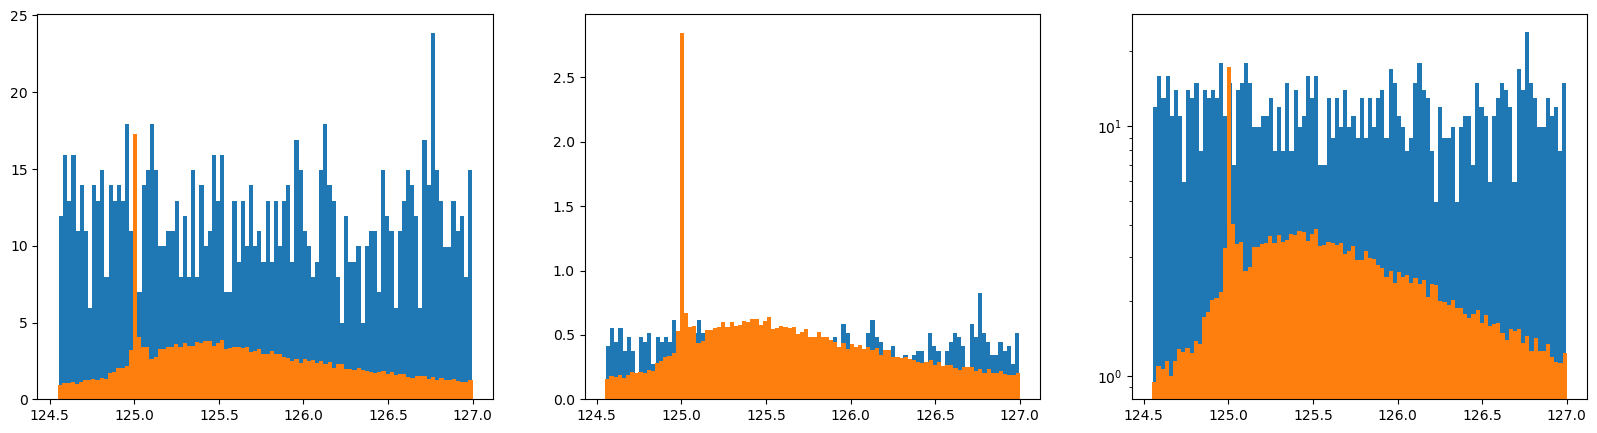

3.1065303151335293


In [150]:
cut_mass_higgs, cut_mass_qcd = cut(sample_dict,background_dict,124.55,127,124.55,127,'mass')
signif(cut_mass_higgs,cut_mass_qcd,'mass')

### Rest of Features

In [140]:
def hist(feature):
    fig,ax = plt.subplots(1,3,figsize=(20,5))
    n_higgs_counts,bins1 = np.histogram(sample_dict[feature],bins = 100)
    n_qcd_counts,bins2 = np.histogram(background_dict[feature],bins = 100)

    ax[0].hist(bins2[:-1], bins2, weights=n_qcd_counts*n_qcd_norm)
    ax[0].hist(bins1[:-1], bins1, weights=n_higgs_counts*n_higgs_norm)
    ax[0].set_title(feature)
    ax[0].set_ylabel('Counts')

    ax[1].hist(bins2[:-1], bins2, weights=n_qcd_counts*n_qcd_norm,density=True)
    ax[1].hist(bins1[:-1], bins1, weights=n_higgs_counts*n_higgs_norm,density=True)
    ax[1].set_title(feature)
    ax[1].set_ylabel('Probability')

    ax[2].hist(bins2[:-1], bins2, weights=n_qcd_counts*n_qcd_norm)
    ax[2].hist(bins1[:-1], bins1, weights=n_higgs_counts*n_higgs_norm)
    ax[2].set_yscale('log')
    ax[2].set_title(feature)
    ax[2].set_ylabel('Probability (log scale)')

    plt.show()

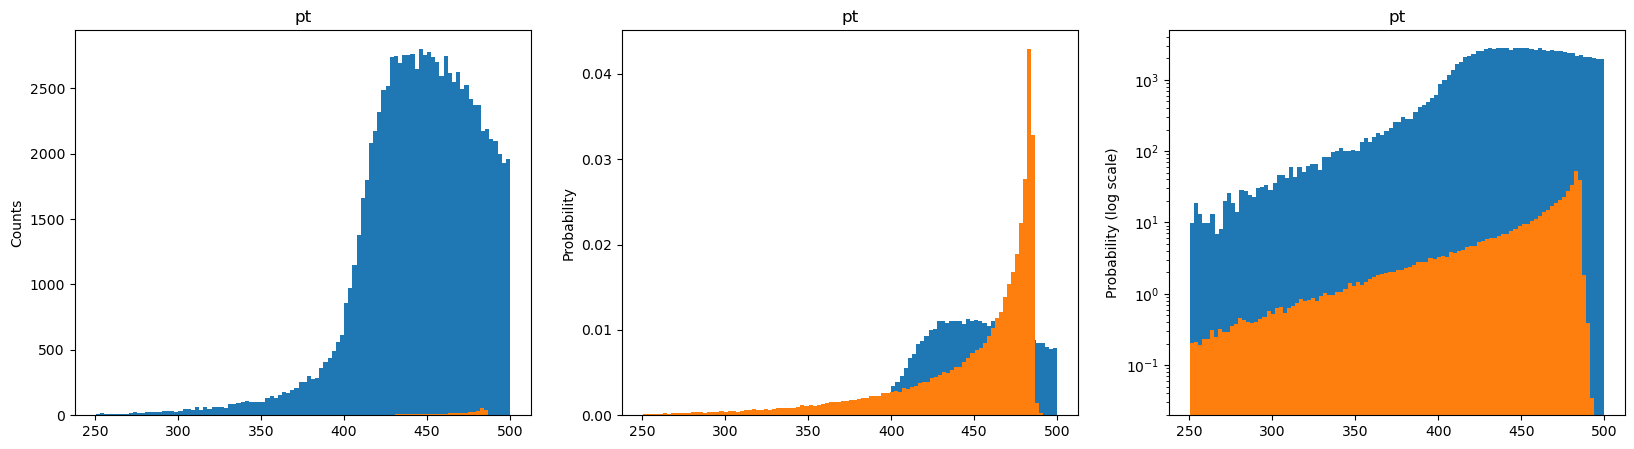

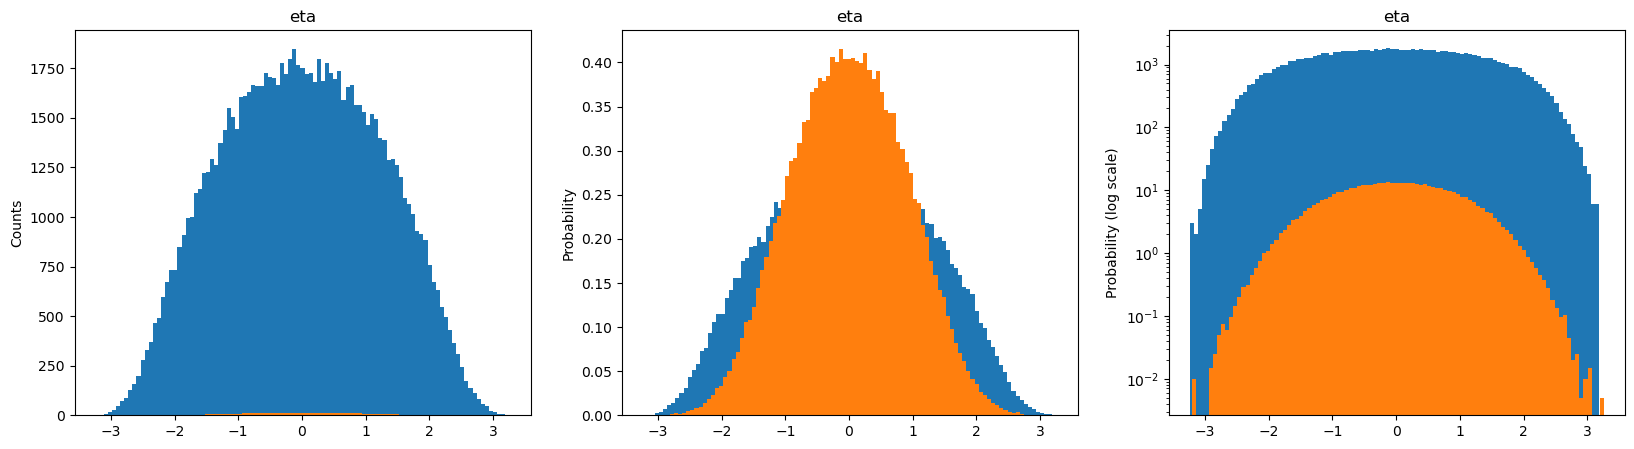

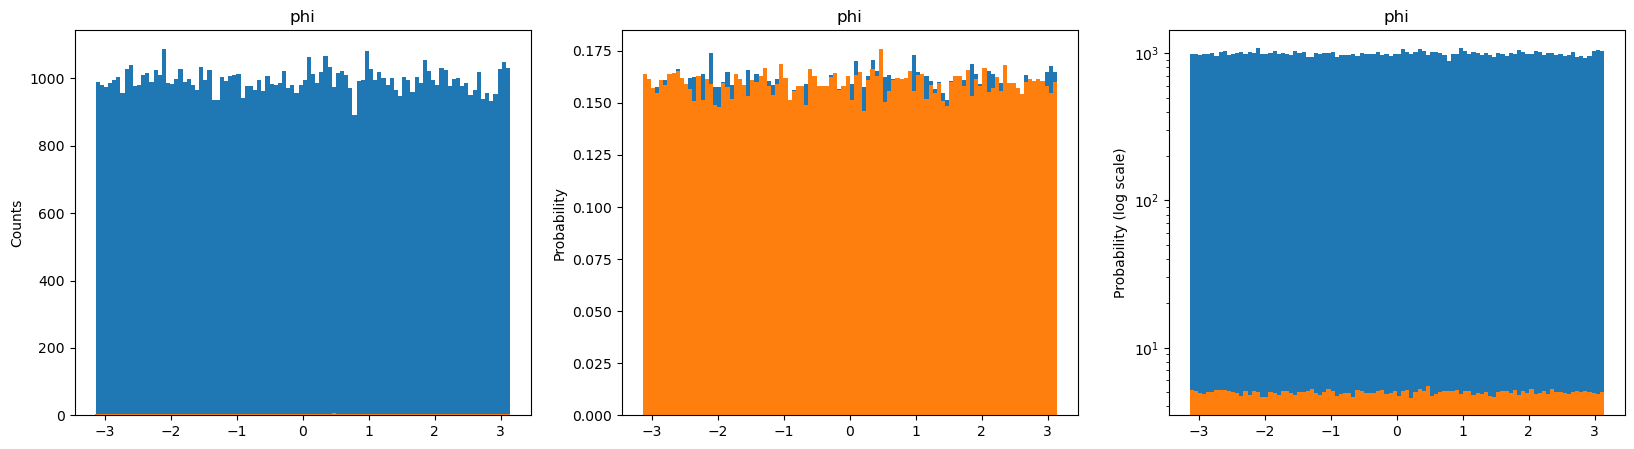

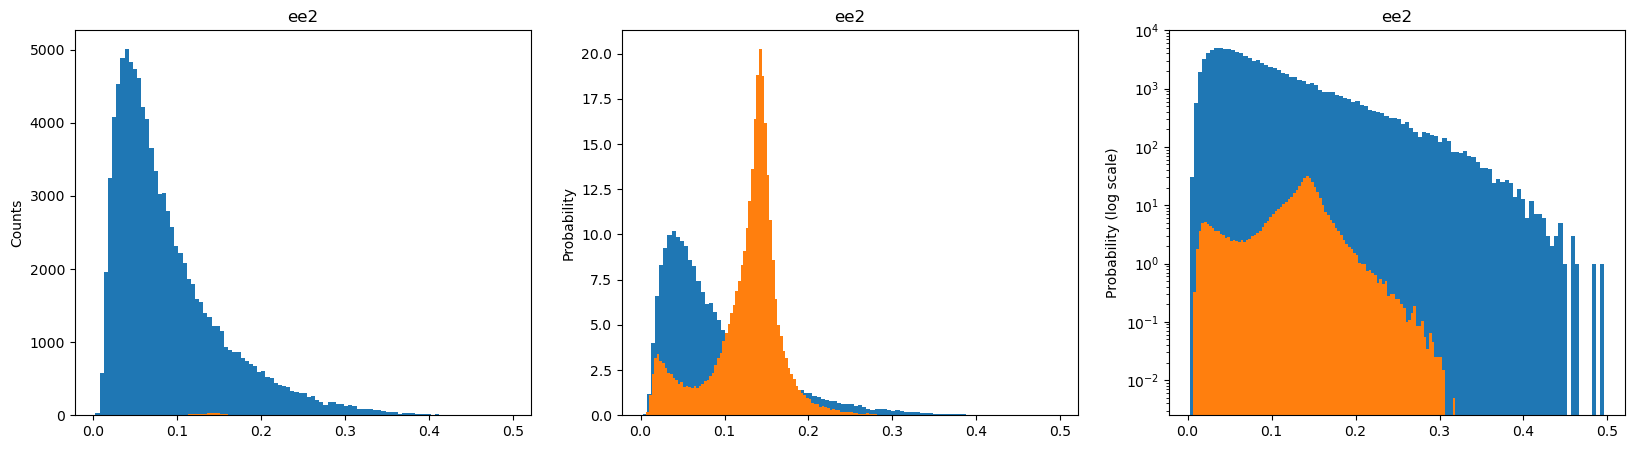

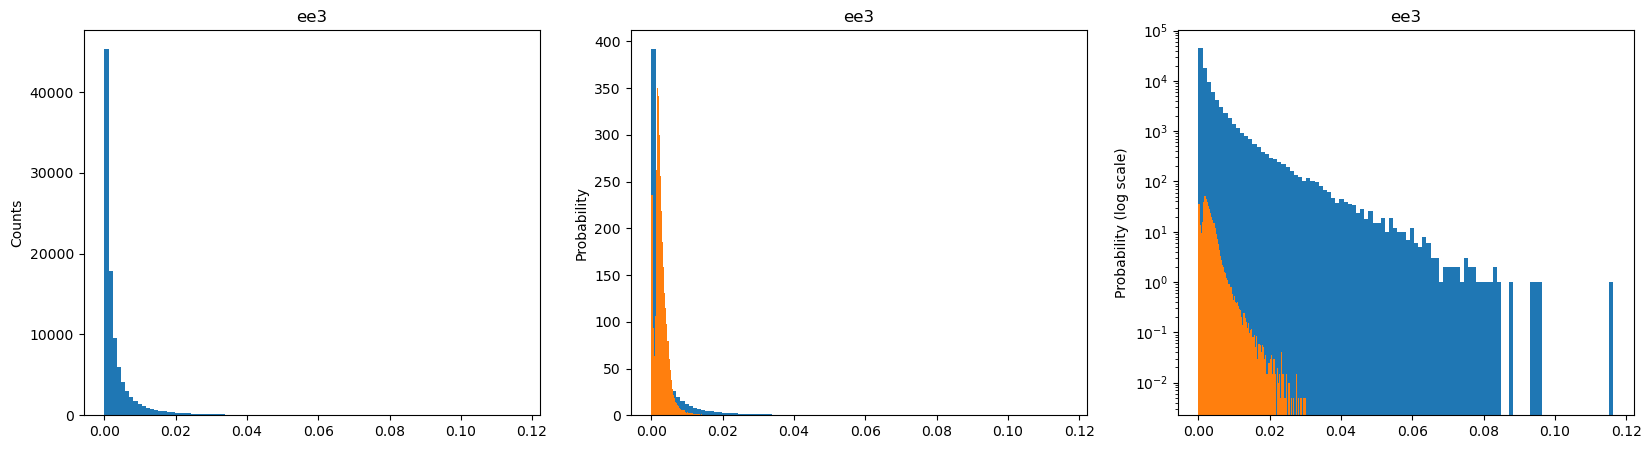

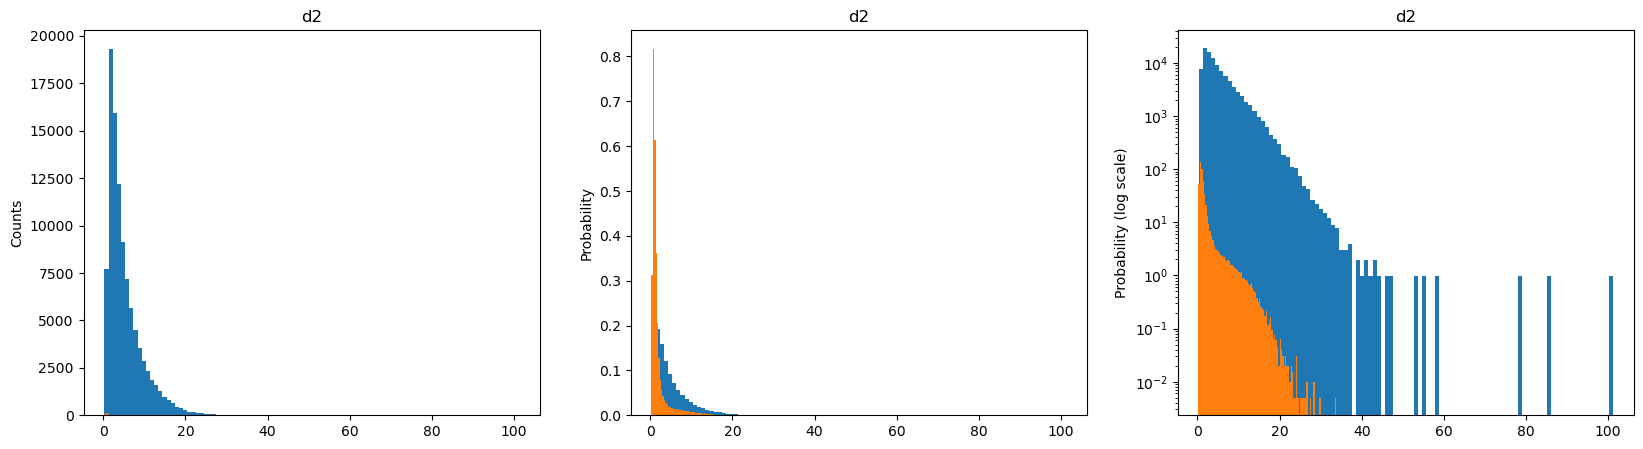

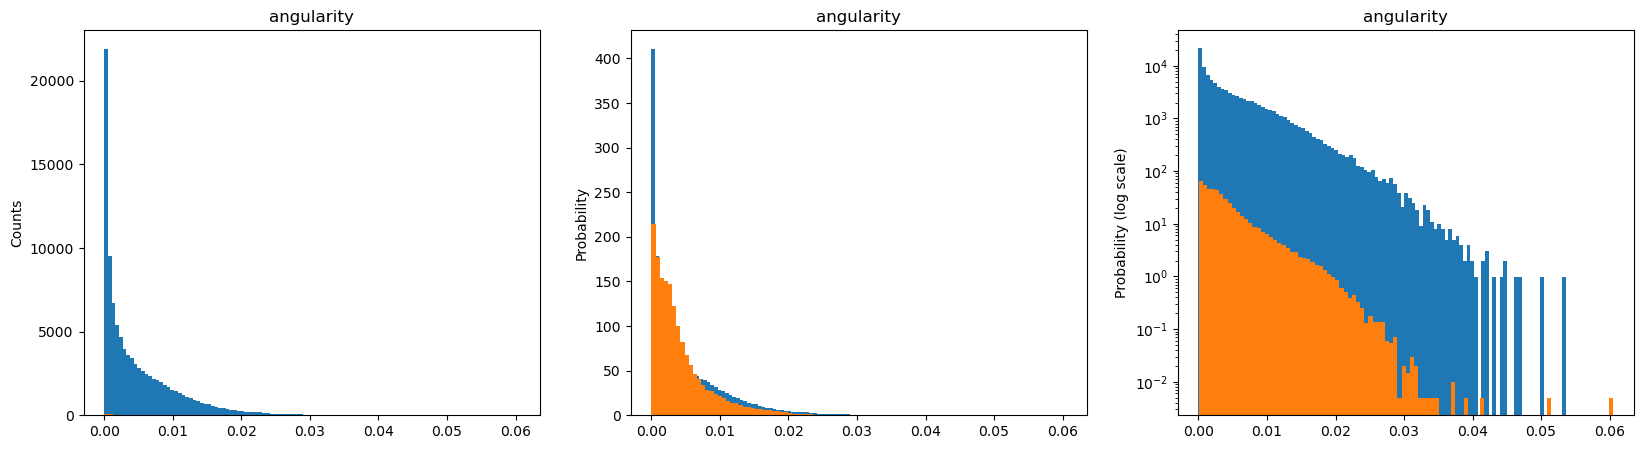

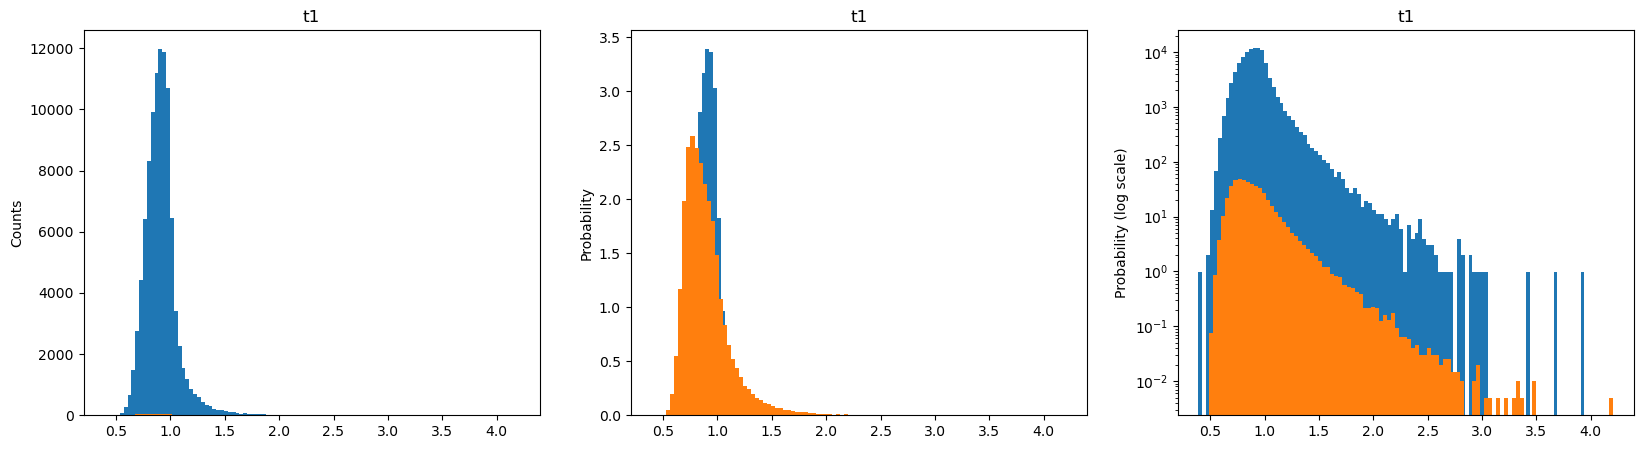

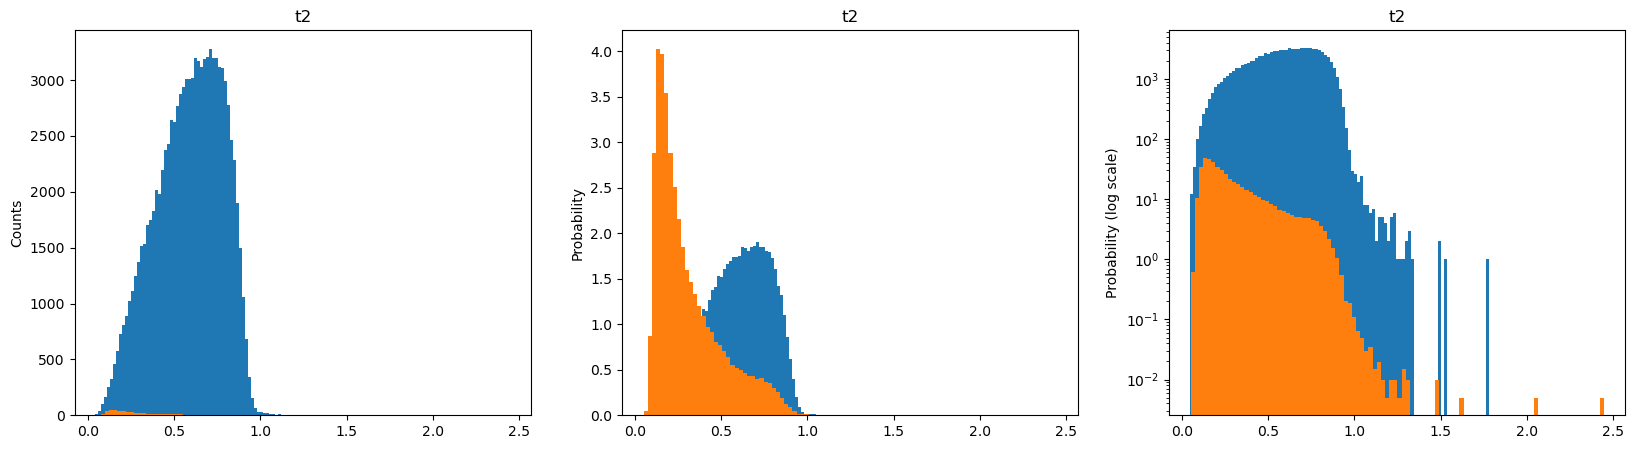

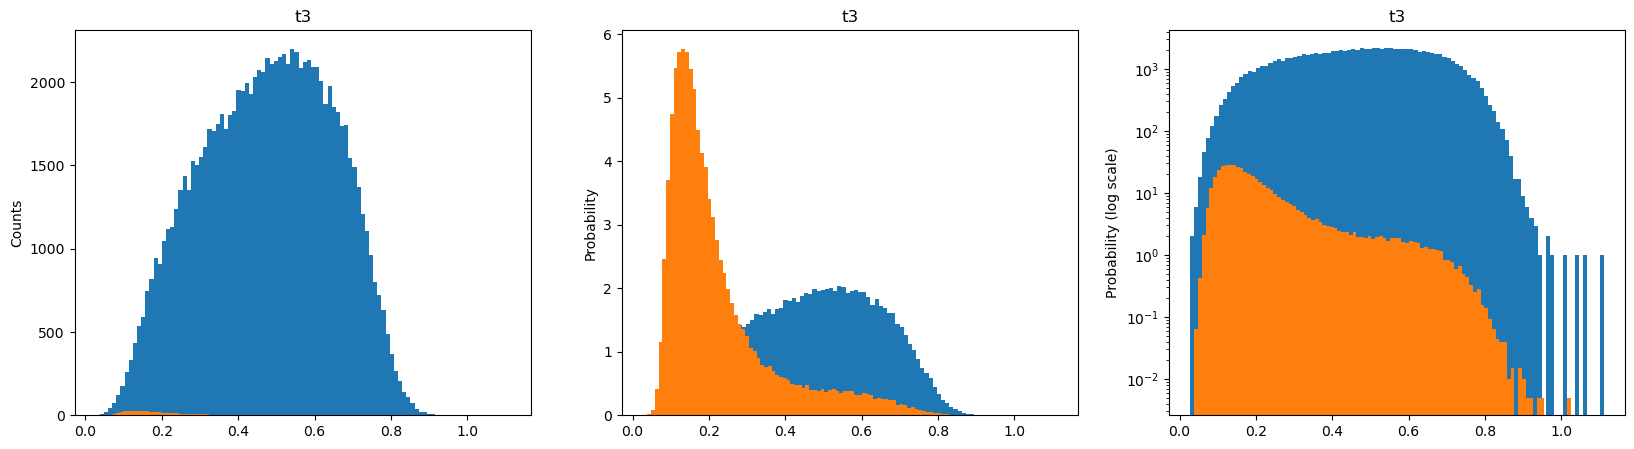

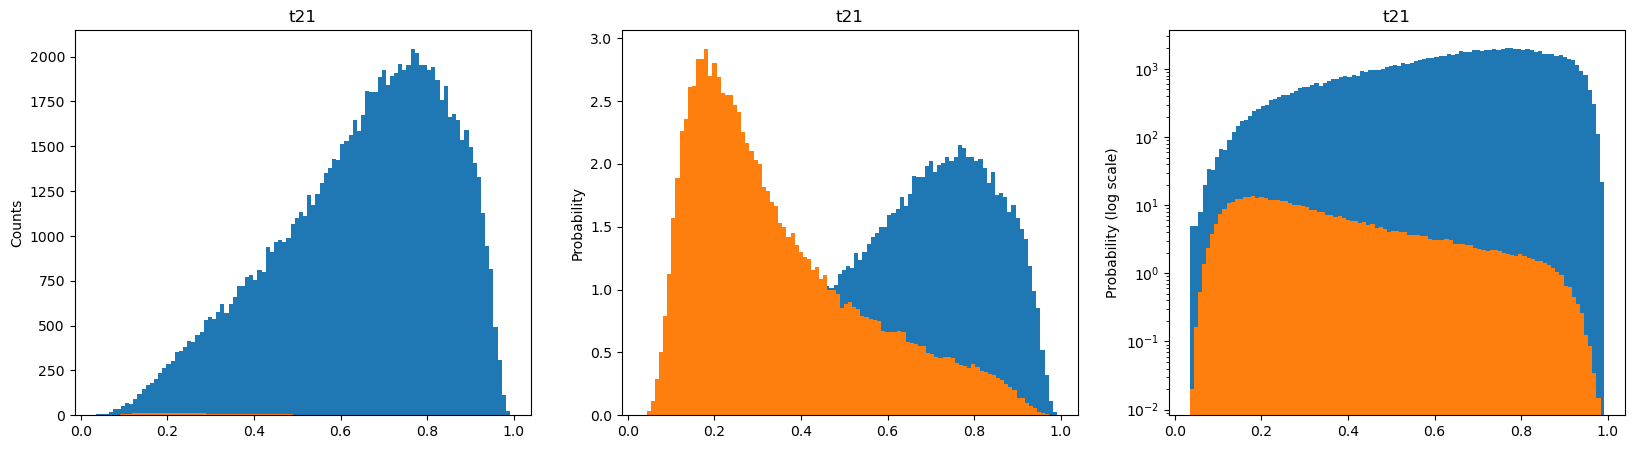

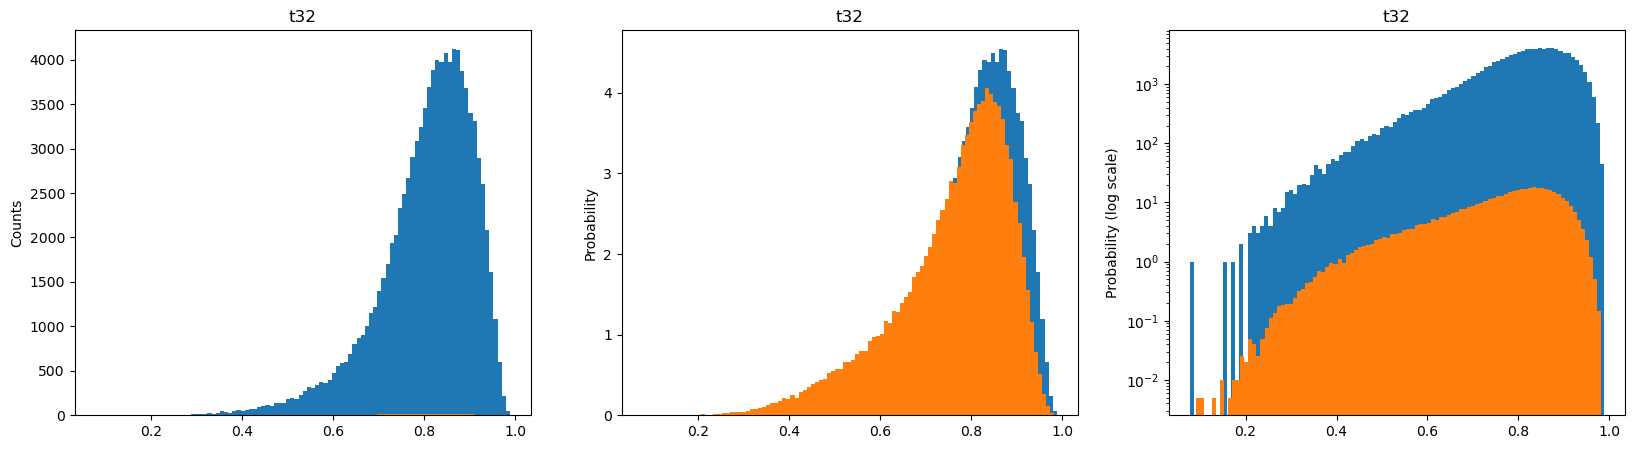

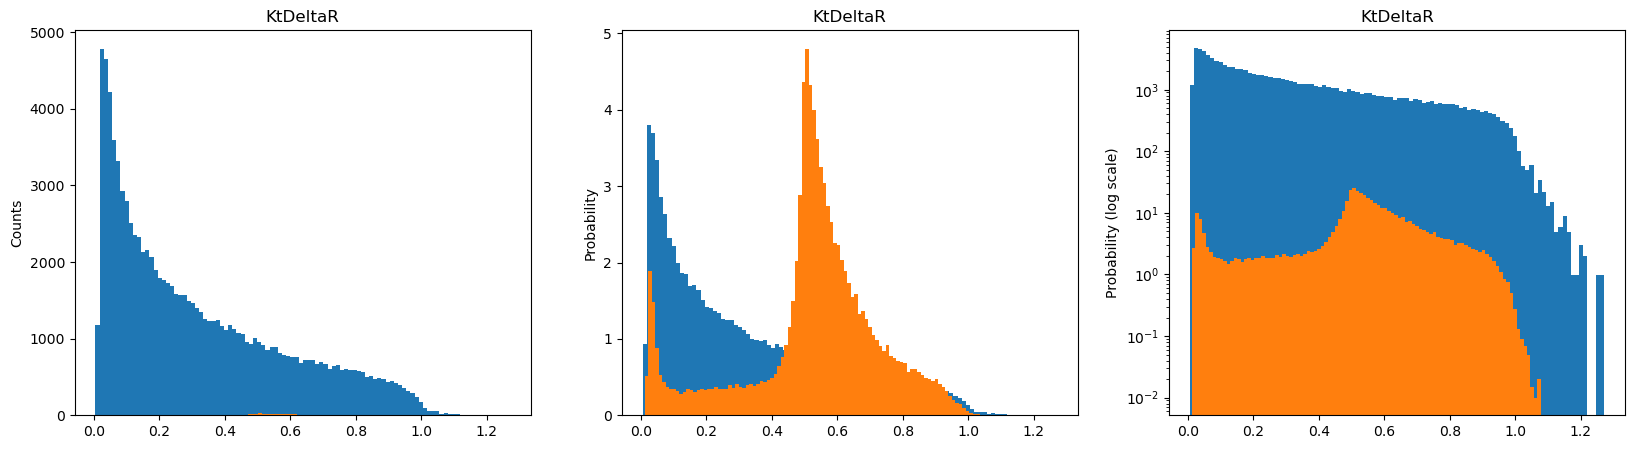

In [141]:
parameters = ['pt','eta','phi','ee2','ee3','d2','angularity','t1','t2','t3','t21','t32','KtDeltaR']
for i in parameters:
    hist(i)

Looking at the other parameters, it is definately possible to make cuts to improve the significance. First lets try the transverse momentum 

In [1]:
cut_pt_higgs, cut_pt_qcd = cut(cut_mass_higgs,cut_mass_qcd,440,490,440,490,'pt')
signif(cut_pt_higgs,cut_pt_qcd,'pt')

NameError: name 'cut' is not defined